In [277]:
# initializing notebook - ashwat

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import keras
import sys

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

In [291]:
# import data from CSV file
raw_data = pd.read_csv('NFLCombineData.csv')
print(raw_data.shape)

(4945, 25)


In [292]:
# quick test, to see how many values are missing for a specific parameter
parameter = 'fortyyd'
raw_data_no_outlier = raw_data.loc[raw_data[parameter] > 0]
print("Number of Players' Data Missing for -->", "\b", parameter, ":", raw_data.shape[0]-raw_data_no_outlier.shape[0])

Number of Players' Data Missing for -->  fortyyd : 191


In [293]:
# combining positions based on related characterisitcs into groupings (6 classes)
    # 0: Running Backs: RB, FB
    # 1: Pass Catchers: WR, TE
    # 2: Defensive Backs: FS, SS, CB
    # 3: Lineman: OT, OG, OC, C, NT, DT, DE, LS 
    # 4: Linebackers: ILB, OLB
    # 5: Quarterback + Special Team: QB, P, K
    
# create dictionary of metrics corresponding to index in data
pos_dict = {'year': 0, 'name': 1, 'firstname': 2, 'lastname': 3, 'position': 4, 'heightfeet': 5, 
            'heightinches': 6, 'heightinchestotal': 7, 'weight': 8, 'arms': 9, 'hands': 10,
            'fortyyd': 11, 'twentyyd': 12, 'tenyd': 13, 'twentyss': 14, 'threecone': 15, 
            'vertical': 16, 'broad': 17, 'bench': 18, 'round': 19, 'college': 20, 
            'pickround': 21, 'picktotal': 22, 'wonderlic': 23, 'nflgrade': 24}

# extract all players (stored by position) from raw_data
rb = (raw_data.loc[raw_data['position'] == 'RB']).to_numpy()
fb = (raw_data.loc[raw_data['position'] == 'FB']).to_numpy()
wr = (raw_data.loc[raw_data['position'] == 'WR']).to_numpy()
te = (raw_data.loc[raw_data['position'] == 'TE']).to_numpy()
fs = (raw_data.loc[raw_data['position'] == 'FS']).to_numpy()
ss = (raw_data.loc[raw_data['position'] == 'SS']).to_numpy()
cb = (raw_data.loc[raw_data['position'] == 'CB']).to_numpy()
ot = (raw_data.loc[raw_data['position'] == 'OT']).to_numpy()
og = (raw_data.loc[raw_data['position'] == 'OG']).to_numpy()
oc = (raw_data.loc[raw_data['position'] == 'OC']).to_numpy()
c = (raw_data.loc[raw_data['position'] == 'C']).to_numpy()
nt = (raw_data.loc[raw_data['position'] == 'NT']).to_numpy()
dt = (raw_data.loc[raw_data['position'] == 'DT']).to_numpy()
de = (raw_data.loc[raw_data['position'] == 'DE']).to_numpy()
ls = (raw_data.loc[raw_data['position'] == 'LS']).to_numpy()
ilb = (raw_data.loc[raw_data['position'] == 'ILB']).to_numpy()
olb = (raw_data.loc[raw_data['position'] == 'OLB']).to_numpy()
qb = (raw_data.loc[raw_data['position'] == 'QB']).to_numpy()
p = (raw_data.loc[raw_data['position'] == 'P']).to_numpy()
k = (raw_data.loc[raw_data['position'] == 'K']).to_numpy()

# concatenate similar positions based on the classification of groups (detailed above)
run_back = np.concatenate((rb, fb))
pass_catch = np.concatenate((wr, te))
defense_back = np.concatenate((fs, ss, cb))
linemen = np.concatenate((ot, og, oc, c, nt, dt, de, ls))
lineback = np.concatenate((ilb, olb))
quarterback_special = np.concatenate((qb, p, k))

In [294]:
# initialize arrays to store data
data_players = []
pos_index = []

# *** INPUT HERE, WHICH PARAMETERS TO EXTRACT AND TRAIN ON ***
parameters = ['weight', 'heightinchestotal', 'broad', 'fortyyd']

# 0: Running Backs: RB, FB
for i in range(len(run_back)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(run_back[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(0)
    
# 1: Pass Catchers: WR, TE
for i in range(len(pass_catch)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(pass_catch[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(1)
    
# 2: Defensive Backs: FS, SS, CB
for i in range(len(defense_back)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(defense_back[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(2)
    
# 3: Lineman: OT, OG, OC, C, NT, DT, DE, LS 
for i in range(len(linemen)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(linemen[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(3)
    
# 4: Linebackers: ILB, OLB
for i in range(len(lineback)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(lineback[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(4)
    
# 5: Quarterback + Special Team: QB, P, K
for i in range(len(quarterback_special)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(quarterback_special[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(5)
    
# convert from list to array
data_players = np.array(data_players)

# one-hot encode outputs for classifcation
pos_index = np.array(pos_index)
pos_cat = to_categorical(pos_index, 6)

print(len(data_players)) # --> 4945, all players metrics pulled
print(len(data_players[0])) # --> 4, all parameters considered
print(len(pos_index)) # --> 4945, all players' groupings labeled

# ALL GOOD SO FAR

4945
4
4945


In [295]:
model = Sequential()
model.add(Dense(units=6, input_shape=(len(parameters),), activation='softmax')) # 3 output units, because 3 classes
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [296]:
h = model.fit(x=data_players, y=pos_cat, validation_split = 0.2, verbose=1, epochs=100)

Train on 3956 samples, validate on 989 samples
Epoch 1/100
3956/3956 [==============================] - 0s 40us/step - loss: 69.4915 - accuracy: 0.1251 - val_loss: 52.4557 - val_accuracy: 0.0738
Epoch 2/100
3956/3956 [==============================] - 0s 24us/step - loss: 7.6033 - accuracy: 0.3625 - val_loss: 56.0689 - val_accuracy: 0.0617
Epoch 3/100
3956/3956 [==============================] - 0s 25us/step - loss: 2.5733 - accuracy: 0.4922 - val_loss: 58.8669 - val_accuracy: 0.0152
Epoch 4/100
3956/3956 [==============================] - 0s 26us/step - loss: 1.4457 - accuracy: 0.5561 - val_loss: 59.4540 - val_accuracy: 0.0667
Epoch 5/100
3956/3956 [==============================] - 0s 26us/step - loss: 1.0386 - accuracy: 0.5928 - val_loss: 59.4716 - val_accuracy: 0.0566
Epoch 6/100
3956/3956 [==============================] - 0s 29us/step - loss: 0.9088 - accuracy: 0.6188 - val_loss: 59.5666 - val_accuracy: 0.0566
Epoch 7/100
3956/3956 [==============================] - 0s 26us/step 

3956/3956 [==============================] - 0s 32us/step - loss: 0.8533 - accuracy: 0.6246 - val_loss: 60.3848 - val_accuracy: 0.0374
Epoch 57/100
3956/3956 [==============================] - 0s 23us/step - loss: 0.8355 - accuracy: 0.6287 - val_loss: 60.3038 - val_accuracy: 0.0718
Epoch 58/100
3956/3956 [==============================] - 0s 22us/step - loss: 0.8491 - accuracy: 0.6170 - val_loss: 60.6722 - val_accuracy: 0.0364
Epoch 59/100
3956/3956 [==============================] - 0s 24us/step - loss: 0.8534 - accuracy: 0.6173 - val_loss: 60.4419 - val_accuracy: 0.0546
Epoch 60/100
3956/3956 [==============================] - 0s 22us/step - loss: 0.8196 - accuracy: 0.6211 - val_loss: 60.4112 - val_accuracy: 0.0475
Epoch 61/100
3956/3956 [==============================] - 0s 20us/step - loss: 0.8458 - accuracy: 0.6244 - val_loss: 60.4434 - val_accuracy: 0.0607
Epoch 62/100
3956/3956 [==============================] - 0s 31us/step - loss: 0.8153 - accuracy: 0.6294 - val_loss: 60.5199 

Text(0.5, 1.0, 'accuracy')

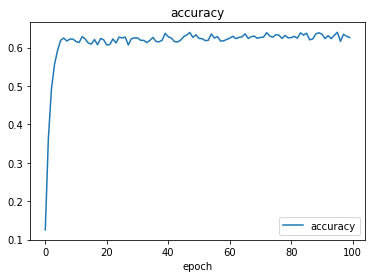

In [297]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

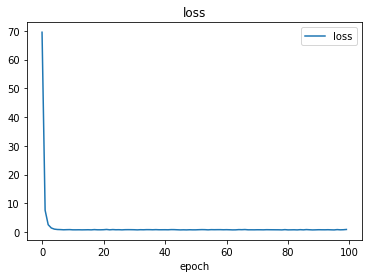

In [298]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [299]:
point = np.array(dataPlayers)

prediction = model.predict_classes(point)
print("Predicted Class:", prediction)
print("Actual Class:", pos_index)

Predicted Class: [1 1 1 1 1 1 2 0 2 1 0 0 0 1 1 0 1 1 3 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 2 1 0
 1 1 1 1 1 0 0 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 0 1 1 0 1 0 1 1 1 1 3 0 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 2 1 1 0 1 1 0 0 0 1 1 3 0 1 1 1 0 1 1 3 1
 1 1 1 2 1 0 0 1 0 1 1 1 1 2 1 0 1 0 1 2 1 1 2 0 1 3 0 1 1 2 1 1 0 1 1 0 1
 1 0 2 1 1 2 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 2 1 1 2 1 2 1 1
 1 0 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 2 1 1 1 1 1 1
 1 1 2 1 1 1 1 0 0 1 1 2 0 1 1 0 1 1 1 2 1 1 1 1 1 1 0 3 1 1 1 1 0 1 1 0 1
 1 1 2 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 3 1 1 1 1 1 1 0 0
 1 2 3 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 1 2 1 0 0 1 1 1 1 1 1 0 2 3 2 1 2 1 1 1 1 0 1 2 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 2 0 1 2 1 2 0 0 2 1 0 0 1 2 2 0 1 0 2 1 1 1 2 1 1 1 2 1 1
 2 0 2 1 1 0 1 1 1 2 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0
 2 2 2 1 0 1 1 1 1 3 0 3 3 1 3 1 3 0 1 3 3 3 3 3 0 3 3 1 3 3 3 3 3 0 0 3 0
 0 0 0 3